<a href="https://colab.research.google.com/github/lethikieuly/Data-mining-/blob/main/DoAn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Lấy dữ liệu 200 tweet có liên quan đến từ khóa "bitcoin"**

In [ ]:
!pip install twitter
import json
import twitter

# Go to https://developer.twitter.com/en/apps to create an app and get values
# for these credentials, which you'll need to provide in place of these
# empty string values that are defined as placeholders.
# See https://developer.twitter.com/en/docs/basics/authentication/overview/oauth
# for more information on Twitter's OAuth implementation.
CONSUMER_KEY = 'PT3TjQFnQjwPq6UwWh0l9mVLA'
CONSUMER_SECRET = 'uHwkJ6qK5WKWwRYsKy5zjkyYG0U68MtBButh0WKhtenfAocMJJ'
OAUTH_TOKEN = '1656867841-JpwZ5MWT4jNHZsF8vxFjSkaEmcKfx1gHEk8lkVN'
OAUTH_TOKEN_SECRET = '95LXQGHGhXrWE8OsFB1sAhy2Efcx0TRInDxova9kzUsGF'


auth = twitter.oauth.OAuth(OAUTH_TOKEN, OAUTH_TOKEN_SECRET,
                           CONSUMER_KEY, CONSUMER_SECRET)

twitter_api = twitter.Twitter(auth=auth)

# Nothing to see by displaying twitter_api except that it's now a
# defined variable

print(twitter_api)

     |████████████████████████████████| 61kB 3.1MB/s 


Length of statuses 100
Length of statuses 200
Length of statuses 300
Length of statuses 400
Length of statuses 500
Length of statuses 600
Length of statuses 699
Length of statuses 799
Length of statuses 899
Length of statuses 999
Length of statuses 1099
Length of statuses 1199
Length of statuses 1299
Length of statuses 1398
Length of statuses 1498
Length of statuses 1598
Length of statuses 1698
Length of statuses 1798
Length of statuses 1898
Length of statuses 1998
Length of statuses 2098
Length of statuses 2198
Length of statuses 2298
Length of statuses 2398
Length of statuses 2498
Length of statuses 2598
Length of statuses 2698
Length of statuses 2798
Length of statuses 2898
Length of statuses 2998
Length of statuses 3098
Length of statuses 3198
Length of statuses 3298
Length of statuses 3398
Length of statuses 3498
Length of statuses 3598
Length of statuses 3698
Length of statuses 3798
Length of statuses 3895
Length of statuses 3995
Length of statuses 4095
Length of statuses 4195
Le

TwitterHTTPError: ignored

In [ ]:
#Trích xuất các thực thể tweet,tách các thực thể và văn bản của một số tweet thành một cấu trúc dữ liệu thuận tiện để kiểm tra thêm.
#Trích xuất text, screen nam và thẻ bắt đầu bằng # từ các tweet được thu thập
status_texts = [ status['text'] 
                 for status in statuses ]

screen_names = [ user_mention['screen_name'] 
                 for status in statuses
                     for user_mention in status['entities']['user_mentions'] ]

hashtags = [ hashtag['text'] 
             for status in statuses
                 for hashtag in status['entities']['hashtags'] ]

# Compute a collection of all words from all tweets
words = [ w 
          for t in status_texts 
              for w in t.split() ]
#Trong khi chúng tôi chỉ trích xuất 5 mục đầu tiên của mỗi danh sách chưa được xếp hạng 
#để có cảm nhận về dữ liệu, bây giờ chúng ta hãy xem xét kỹ hơn những gì có trong dữ liệu
# bằng cách tính toán phân phối tần suất và xem 10 mục hàng đầu trong mỗi danh sách
#tính toán phân bố tần số dưới dạng danh sách các thuật ngữ được xếp hạng
from collections import Counter

for item in [words, screen_names, hashtags]:
    c = Counter(item)
    print(c.most_common()[:20]) # top 10
    print()

[('RT', 11729), ('#Bitcoin', 7829), ('to', 6436), ('the', 5785), ('and', 3813), ('is', 3494), ('in', 3372), ('a', 3196), ('of', 2943), ('#bitcoin', 2695), ('on', 2111), ('for', 2059), ('I', 1767), ('&amp;', 1672), ('this', 1398), ('will', 1376), ('that', 1363), ('you', 1360), ('one', 1289), ('it', 1220)]

[('elonmusk', 1039), ('flurbnb', 971), ('michael_saylor', 700), ('PeterSchiff', 499), ('DocumentingBTC', 465), ('ashwsbreal', 447), ('DinoParkFinance', 381), ('tylerdawnsmith1', 298), ('Darth_Elon', 296), ('EylemCulculoglu', 292), ('TimDraper', 243), ('TheCryptoLark', 239), ('dippy_eth', 226), ('Miraz_Aslan', 226), ('ComPro01', 188), ('Airdrop', 183), ('BTC_Archive', 174), ('100trillionUSD', 172), ('stoolpresidente', 162), ('Tesla', 155)]

[('Bitcoin', 8476), ('bitcoin', 3025), ('cryptocurrency', 1234), ('dogecoin', 1188), ('BTC', 780), ('cryptocurrencies', 602), ('crypto', 493), ('ShibaArmy', 421), ('Ethereum', 366), ('Crypto', 329), ('btc', 311), ('cryptocurrencyNews', 302), ('BITCO

In [ ]:
#Kết quả của phân bố tần suất là một bản đồ của các cặp khóa / giá trị tương ứng với các cụm từ
# và tần suất của chúng, vì vậy hãy giúp việc xem xét kết quả dễ dàng hơn một chút 
#bằng cách tạo ra một định dạng bảng.
#RT” là một mã thông báo rất phổ biến, ngụ ý rằng có là một số lượng retweet đáng kể 
from prettytable import PrettyTable

for label, data in (('Word', words), 
                    ('Screen Name', screen_names), 
                    ('Hashtag', hashtags)):
    pt = PrettyTable(field_names=[label, 'Count']) 
    c = Counter(data)
    [ pt.add_row(kv) for kv in c.most_common()[:100] ]
    pt.align[label], pt.align['Count'] = 'l', 'r' # Set column alignment
    print(pt)

+-------------------+-------+
| Word              | Count |
+-------------------+-------+
| RT                | 11729 |
| #Bitcoin          |  7829 |
| to                |  6436 |
| the               |  5785 |
| and               |  3813 |
| is                |  3494 |
| in                |  3372 |
| a                 |  3196 |
| of                |  2943 |
| #bitcoin          |  2695 |
| on                |  2111 |
| for               |  2059 |
| I                 |  1767 |
| &amp;             |  1672 |
| this              |  1398 |
| will              |  1376 |
| that              |  1363 |
| you               |  1360 |
| one               |  1289 |
| it                |  1220 |
| #dogecoin         |  1142 |
| are               |  1133 |
| be                |  1130 |
| Retweet           |  1122 |
| #cryptocurrency   |  1093 |
| person            |  1051 |
| hours             |  1008 |
| follow            |   982 |
| The               |   970 |
| @flurbnb:         |   963 |
| with    

In [ ]:
from collections import Counter

for item in [words, screen_names, hashtags]:
    c = Counter(item)
    print(c.most_common()[:20]) # top 10
    print()

[('RT', 11729), ('#Bitcoin', 7829), ('to', 6436), ('the', 5785), ('and', 3813), ('is', 3494), ('in', 3372), ('a', 3196), ('of', 2943), ('#bitcoin', 2695), ('on', 2111), ('for', 2059), ('I', 1767), ('&amp;', 1672), ('this', 1398), ('will', 1376), ('that', 1363), ('you', 1360), ('one', 1289), ('it', 1220)]

[('elonmusk', 1039), ('flurbnb', 971), ('michael_saylor', 700), ('PeterSchiff', 499), ('DocumentingBTC', 465), ('ashwsbreal', 447), ('DinoParkFinance', 381), ('tylerdawnsmith1', 298), ('Darth_Elon', 296), ('EylemCulculoglu', 292), ('TimDraper', 243), ('TheCryptoLark', 239), ('dippy_eth', 226), ('Miraz_Aslan', 226), ('ComPro01', 188), ('Airdrop', 183), ('BTC_Archive', 174), ('100trillionUSD', 172), ('stoolpresidente', 162), ('Tesla', 155)]

[('Bitcoin', 8476), ('bitcoin', 3025), ('cryptocurrency', 1234), ('dogecoin', 1188), ('BTC', 780), ('cryptocurrencies', 602), ('crypto', 493), ('ShibaArmy', 421), ('Ethereum', 366), ('Crypto', 329), ('btc', 311), ('cryptocurrencyNews', 302), ('BITCO

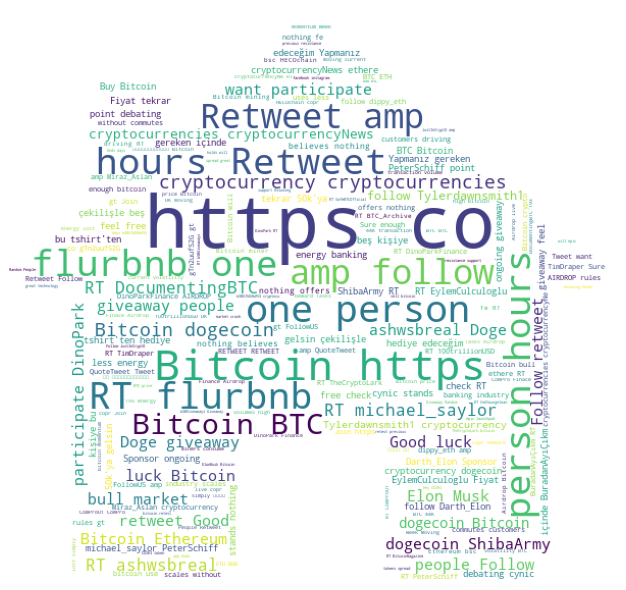

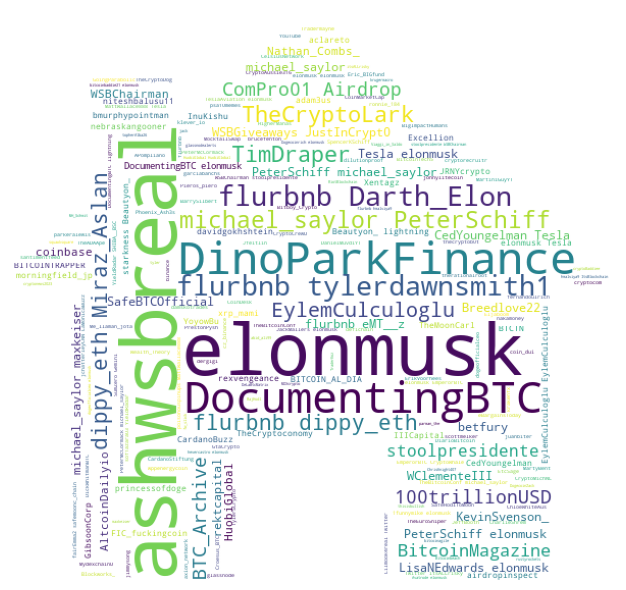

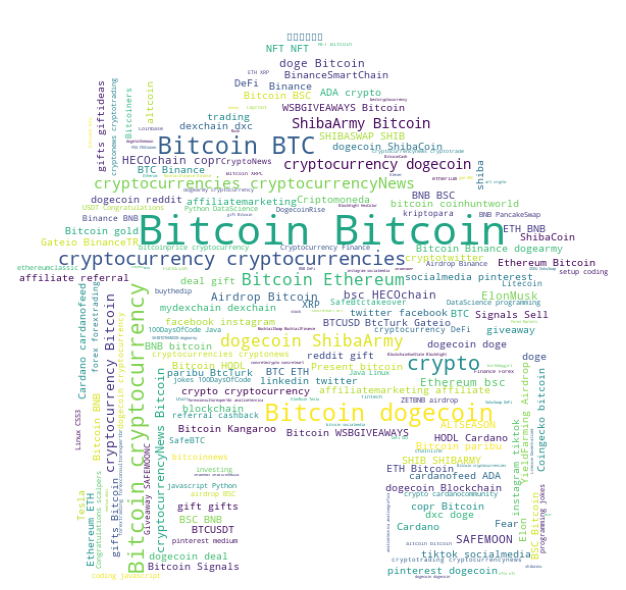

In [ ]:
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud
# Start with one review:
#text = df.description[0]
#text='With the wine dataset, you can group by country and look at 
#either the summary statistics for all countries points and price or 
#select the'
tW=''
for item in [words]:
  for i in item:
     tW=tW+' '+i
     tW=tW.replace('#','')

tSn=''
for item in [screen_names]:
  for i in item:
     tSn=tSn+' '+i
     tSn=tSn.replace('#','')

tHt=''
for item in [hashtags]:
  for i in item:
     tHt=tHt+' '+i
     tHt=tHt.replace('#','')
    
     
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
import urllib
import requests
import numpy as np
import matplotlib.pyplot as plt

mask = np.array(Image.open(requests.get('http://www.clker.com/cliparts/O/i/x/Y/q/P/yellow-house-hi.png', stream=True).raw))

# This function takes in your text and your mask and generates a wordcloud. 
def generate_wordcloud(words, mask):
    word_cloud = WordCloud(width = 512, height = 512, background_color='white', stopwords=STOPWORDS, mask=mask).generate(words)
    plt.figure(figsize=(10,8),facecolor = 'white', edgecolor='blue')
    plt.imshow(word_cloud)
    plt.axis('off')
    plt.tight_layout(pad=0)
    plt.show()
    
#Run the following to generate your wordcloud
generate_wordcloud(tW, mask)
generate_wordcloud(tSn, mask)
generate_wordcloud(tHt, mask)

In [ ]:
# A function for computing lexical diversity
def lexical_diversity(tokens):
    return len(set(tokens))/len(tokens) 

# A function for computing the average number of words per tweet
def average_words(statuses):
    total_words = sum([ len(s.split()) for s in statuses ]) 
    return total_words/len(statuses)

print(lexical_diversity(words))
print(lexical_diversity(screen_names))
print(lexical_diversity(hashtags))
print(average_words(status_texts))

0.11713754832897487
0.16861777521129717
0.07836910961514035
17.782944874005675


In [ ]:
#tìm những lượt retweet phổ biến nhất là chỉ cần lặp lại mỗi lần cập nhật trạng thái
#và lưu trữ số lượt retweet, người khởi tạo retweet và văn bản của lượt retweet nếu trạng thái cập nhật là một retweet.
retweets = [
            # Store out a tuple of these three values ...
            (status['retweet_count'], 
             status['retweeted_status']['user']['screen_name'],
             status['retweeted_status']['id'],
             status['text']) 
            
            # ... for each status ...
            for status in statuses 
            
            # ... so long as the status meets this condition.
                if 'retweeted_status' in status.keys()
           ]

# Slice off the first 5 from the sorted results and display each item in the tuple

pt = PrettyTable(field_names=['Count', 'Screen Name', 'Tweet ID', 'Text'])
[ pt.add_row(row) for row in sorted(retweets, reverse=True)[:20] ]
pt.max_width['Text'] = 50
pt.align= 'l'
print(pt)
#cryptocurrencies (tiền điện tử) đứng đầu danh sách, không có tương tác nào liên quan đến người dùng
#vd screen name wppenergycoin có tần suất reweet là 27995, mã tweet id ...
#nhưng mẫu mà đã rút ra cho truy vấn này quá nhỏ nên không có xu hướng nào xuất hiện về elon musl

+-------+----------------+---------------------+----------------------------------------------------+
| Count | Screen Name    | Tweet ID            | Text                                               |
+-------+----------------+---------------------+----------------------------------------------------+
| 27995 | wppenergycoin  | 1393258901764775947 | RT @wppenergycoin: WPP Token 🚀                    |
|       |                |                     | #cryptocurrency #crypto #cryptocurrencies          |
|       |                |                     | #cryptonews #cryptotrading #cryptocurrencynews     |
|       |                |                     | #cryptotrade  #cry…                                |
| 27995 | wppenergycoin  | 1393258901764775947 | RT @wppenergycoin: WPP Token 🚀                    |
|       |                |                     | #cryptocurrency #crypto #cryptocurrencies          |
|       |                |                     | #cryptonews #cryptotrading #cryptoc

Text(0.5, 0, 'Word Rank')

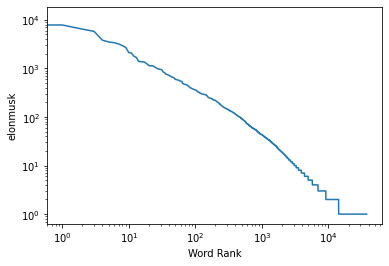

In [ ]:
#Trực quan quan hóa dữ liệu tần suất với biểu đồ
#giá trị y¬axis trên biểu đồ tương ứng với số lần một từ xuất hiện.
#giá trị x¬axis sẽ tương ứng với chỉ mục của bộ giá trị
# trong khoảng 5 chỉ mục của bộ giá trọ word rank thì số lần từ xuất hiện cao nhất xấp xỉ 10^4
import matplotlib.pyplot as plt
%matplotlib inline
word_counts = sorted(Counter(words).values(), reverse=True)

plt.loglog(word_counts)
plt.ylabel("elonmusk")
plt.xlabel("Word Rank")


Text(0.5, 0, 'Word Rank')

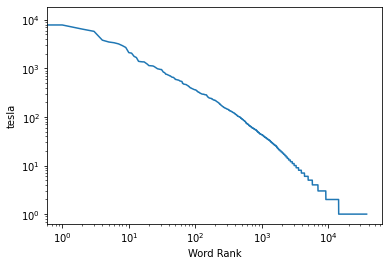

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
word_counts = sorted(Counter(words).values(), reverse=True)

plt.loglog(word_counts)
plt.ylabel("tesla")
plt.xlabel("Word Rank")

Text(0.5, 0, 'Word Rank')

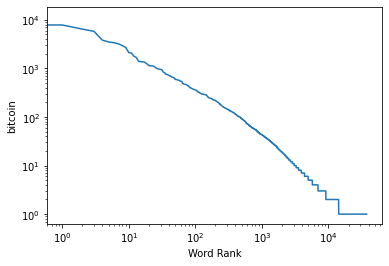

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
word_counts = sorted(Counter(words).values(), reverse=True)

plt.loglog(word_counts)
plt.ylabel("bitcoin")
plt.xlabel("Word Rank")

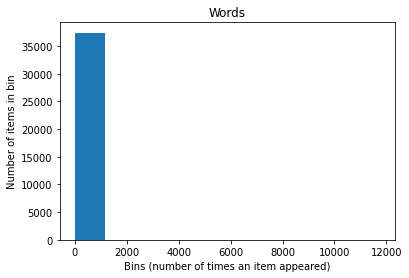

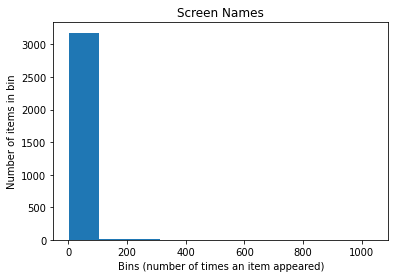

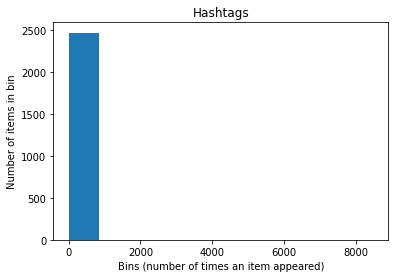

<Figure size 432x288 with 0 Axes>

In [ ]:
#Tạo biểu đồ của các từ, tên màn hình và thẻ bắt đầu bằng #
for label, data in (('Words', words), 
                    ('Screen Names', screen_names), 
                    ('Hashtags', hashtags)):

    # Build a frequency map for each set of data
    # and plot the values
    c = Counter(data)
    plt.hist(list(c.values()))
    
    # Add a title and y-label ...
    plt.title(label)
    plt.ylabel("Number of items in bin")
    plt.xlabel("Bins (number of times an item appeared)")
    
    # ... and display as a new figure
    plt.figure()




Text(0, 0.5, 'Number of tweets in bin')

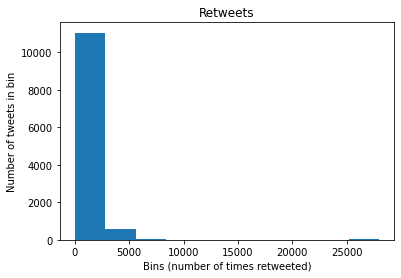

In [ ]:
#Tạo biểu đồ về số lượt retweet
# Using underscores while unpacking values in
# a tuple is idiomatic for discarding them

counts = [count for count, _, _, _ in retweets]

plt.hist(counts)
plt.title('Retweets')
plt.xlabel('Bins (number of times retweeted)')
plt.ylabel('Number of tweets in bin')
#chúng ta thấy rằng có một số tweet được chọn lọc được tweet lại với tần suất cao hơn nhiều so với phần lớn các tweet, 
#chỉ được tweet lại một lần và chiếm phần lớn khối lượng được đưa ra bởi lớn nhất hình chữ nhật màu xanh ở phía bên trái của biểu đồ

In [ ]:
import nltk
import json
import nltk
nltk.download('averaged_perceptron_tagger')
import nltk
nltk.download('punkt')

BLOG_DATA = "drive/My Drive/bitcoin.json"

blog_data = json.loads(open(BLOG_DATA).read())
#tagger = nltk.data.load(_POS_TAGGER)
for post in blog_data:
    sentences = nltk.tokenize.sent_tokenize(post['text'])
    tokens = [nltk.tokenize.word_tokenize(s) for s in sentences]
    pos_tagged_tokens = [nltk.pos_tag(t) for t in tokens]
    #  pos_tagged_tokens[[('Elonmusk', 'tesla'), ('bitcoin', 'tesla'), ('elonmusk', 'bitcoin'), ('elonmusk'),  ('.', '.')]]
    # Flatten the list since we're not using sentence structure
    # and sentences are guaranteed to be separated by a special
    # POS tuple such as ('.', '.')

    pos_tagged_tokens = [token for sent in pos_tagged_tokens for token in sent]

    all_entity_chunks = []
    previous_pos = None
    current_entity_chunk = []
    for (token, pos) in pos_tagged_tokens:

        if pos == previous_pos and pos.startswith('NN'):
            current_entity_chunk.append(token)
        elif pos.startswith('NN'):
            
            if current_entity_chunk != []:
                
                # Note that current_entity_chunk could be a duplicate when appended,
                # so frequency analysis again becomes a consideration

                all_entity_chunks.append((' '.join(current_entity_chunk), pos))
            current_entity_chunk = [token]

        previous_pos = pos

    # Store the chunks as an index for the document
    # and account for frequency while we're at it...

    post['entities'] = {}
    for c in all_entity_chunks:
        post['entities'][c] = post['entities'].get(c, 0) + 1

    # For example, we could display just the title-cased entities

    print(post['text'])
    print('-' * len(post['text']))
    proper_nouns = []
    for (entity, pos) in post['entities']:
        if entity.istitle():
            print('\t{0} ({1})'.format(entity, post['entities'][(entity, pos)]))
    print()
    # The entities section provides arrays of common things included in Tweets: hashtags, user mentions, links, stock tickers (symbols)4

   #entities": {"hashtags": [],"urls": [],"user_mentions": []"symbols": []
    

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
Analyse de prix 5/17: BTC, ETH, BNB, ADA, DOGE, XRP, DOT, BCH, LTC, UNI https://t.co/tTdzCFDpPR | #Bitcoin
----------------------------------------------------------------------------------------------------------

RT @ComPro01: ComPro.Finace @Airdrop is live! 
$copr Reward for Tasks: Up to 150 
 #Airdrop #Bitcoin #Ethereum #bsc #HECOchain #copr
🔶 Join…
--------------------------------------------------------------------------------------------------------------------------------------------
	Reward (1)
	Tasks (1)
	Airdrop (1)
	Bitcoin (1)
	Ethereum (1)

RT @Nathan_Combs_: 5,000,000 #Doge giveaway, 2 people, 2,500,000 each

Follow, Like, Retweet. Good luck

#Bitcoin #DogeCoin #ShibaArmy #Cry…

In [ ]:
#Tính toán Đa dạng từ vựng của Tweet
#Một phép đo nâng cao hơn một chút liên quan đến việc tính toán các tần số đơn giản và có thể
#được áp dụng cho văn bản không có cấu trúc là một số liệu được gọi là đa dạng từ vựng
#Sự đa dạng về từ vựng của các từ trong văn bản của các tweet là khoảng 0,11, mỗi cập nhật trạng thái mang khoảng 11% thông tin duy nhất
#Tuy nhiên sự đa dạng về screen_names (tên màn hình của người dùng) còn cao hơn, Quan sát này cũng có ý nghĩa vì nhiều câu trả lời cho câu hỏi sẽ là tên hiển thị và hầu hết mọi người sẽ cung cấp các câu trả lời giống nhau
#Sự đa dạng về mặt từ vựng của các thẻ bắt đầu bằng # là cực kỳ thấp, với giá trị khoảng 0,078, ngụ ý rằng rất ít giá trị ngoài thẻ bắt đầu bằng #bitcoin xuất hiện nhiều lần trong kết quả.
#Số lượng từ trung bình trên mỗi tweet là cao với giá trị 17, bản chất của hashtag, được thiết kế để thu hút các phản hồi dài.
def lexical_diversity(tokens):
  return len(set(tokens))/len(tokens)
def average_words(statuses):
  total_words= sum([len(s.split()) for s in statuses])
  return total_words/len(statuses)
print(lexical_diversity(words))
print(lexical_diversity(screen_names))
print(lexical_diversity(hashtags))
print(average_words(status_texts))

0.11713754832897487
0.16861777521129717
0.07836910961514035
17.782944874005675
